In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
full_data = np.load("full_data.npz")["full_data"]
#full_data = np.load("/content/full_data.npz")["full_data"]

In [4]:
full_data.shape

(5, 101, 101, 4999)

In [5]:
import numpy as np
from scipy.stats import mode

# Flatten the entire dataset to compute a single mode value
def calculate_dataset_mode(full_data):
    # Flatten the dataset into a 1D array
    flattened_data = full_data.flatten()

    # Calculate the mode of the entire dataset
    dataset_mode = mode(flattened_data, axis=None).mode[0]
    return dataset_mode

# Example usage
dataset_mode = calculate_dataset_mode(full_data)
print(f"Mode of the entire dataset: {dataset_mode}")


C:\Users\sawoo\AppData\Local\Temp\ipykernel_32276\1826841890.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dataset_mode = mode(flattened_data, axis=None).mode[0]


Mode of the entire dataset: 50.0


In [6]:
import numpy as np
from scipy.stats import mode

def calculate_run_mode(run_data):
    # Flatten the run data into a 1D array
    flattened_data = run_data.flatten()

    # Calculate the mode of the run
    run_mode = mode(flattened_data, axis=None).mode[0]
    return run_mode

for run_index in range(full_data.shape[0]):  # Iterate over each run
    run_mode = calculate_run_mode(full_data[run_index])
    print(f"Mode of Run #{run_index + 1}: {run_mode}")


C:\Users\sawoo\AppData\Local\Temp\ipykernel_32276\4266232622.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  run_mode = mode(flattened_data, axis=None).mode[0]


Mode of Run #1: 50.0
Mode of Run #2: 50.0
Mode of Run #3: 50.0
Mode of Run #4: 39.84375
Mode of Run #5: 39.84375


In [7]:
run_one = full_data[0]
run_two =  full_data[1]
run_three = full_data[2]
run_four = full_data[3]
run_five = full_data[4]

run_one_std = np.std(run_one)
run_two_std = np.std(run_two)
run_three_std = np.std(run_three)
run_four_std = np.std(run_four)
run_five_std = np.std(run_five)

print( "STD run 2: ", run_one_std)
print( "STD run 2: ", run_two_std)
print("STD run 3: ", run_three_std)
print("STD run 4: ", run_four_std)
print("STD run 5: ", run_five_std)

STD run 2:  546.9013373753012
STD run 2:  1317.5899513273741
STD run 3:  2106.3075922136973
STD run 4:  378.37384585276914
STD run 5:  1320.1574059766945


  # EXPERIMENT #1

Processed Run with StdDev = 546.90, K = 0.75
Upper Threshold = 460.18, Lower Threshold = -360.18
Number of Transients (1): 2438
Number of Non-Transients (0): 7763


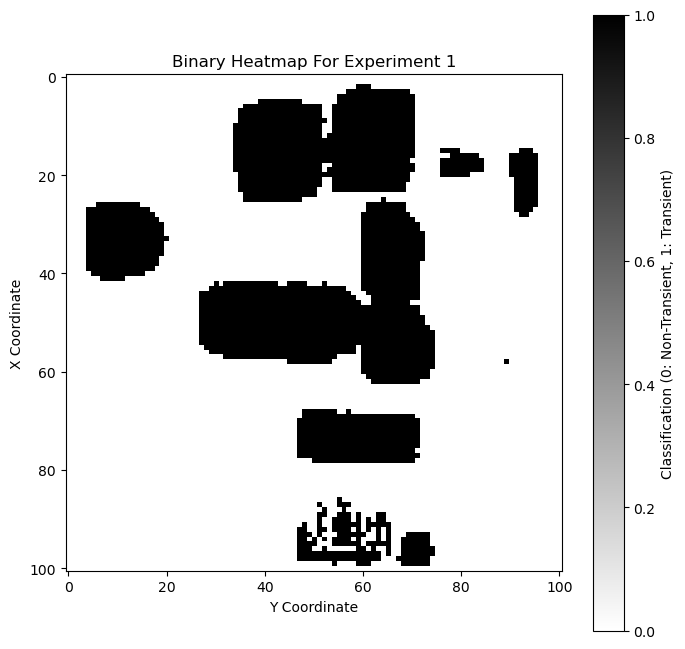

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Select the run to process (e.g., run_one)
run_one = full_data[0]  # Replace with your selected run

# Define the mode and standard deviation for this run
mode = 50
std_dev = np.std(run_one)

# Sensitivity multiplier for this run
k = 0.75  # Adjust this value as needed

# Calculate thresholds
upper_threshold = mode + k * std_dev
lower_threshold = mode - k * std_dev

# Create a binary classification matrix
classification_matrix = np.zeros((run_one.shape[0], run_one.shape[1]), dtype=int)

# Iterate over each pixel and classify
for x in range(run_one.shape[0]):
    for y in range(run_one.shape[1]):
        signal = run_one[x, y]  # Extract the signal for the pixel
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification_matrix[x, y] = 1 if is_transient else 0

# Print summary
print(f"Processed Run with StdDev = {std_dev:.2f}, K = {k}")
print(f"Upper Threshold = {upper_threshold:.2f}, Lower Threshold = {lower_threshold:.2f}")
print(f"Number of Transients (1): {np.sum(classification_matrix == 1)}")
print(f"Number of Non-Transients (0): {np.sum(classification_matrix == 0)}")

# Plot the binary heatmap
plt.figure(figsize=(8, 8))
plt.title("Binary Heatmap For Experiment 1")
plt.imshow(classification_matrix, cmap="gray_r", origin="upper")  # "gray_r" for black = transient
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.colorbar(label="Classification (0: Non-Transient, 1: Transient)")
plt.show()


In [9]:
import pandas as pd

# Create a list to store the results
data_to_save = []

# Iterate over the classification matrix and save each pixel's classification
for x in range(classification_matrix.shape[0]):
    for y in range(classification_matrix.shape[1]):
        classification = classification_matrix[x, y]
        data_to_save.append({"X": x, "Y": y, "Classification": classification})

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data_to_save)

# Save the DataFrame to a CSV file
csv_file = "run_one_classifications.csv"
df.to_csv(csv_file, index=False)
print(f"Classification results saved to {csv_file}")


Classification results saved to run_one_classifications.csv


In [10]:
#printing specific coodinates to see the thresholding

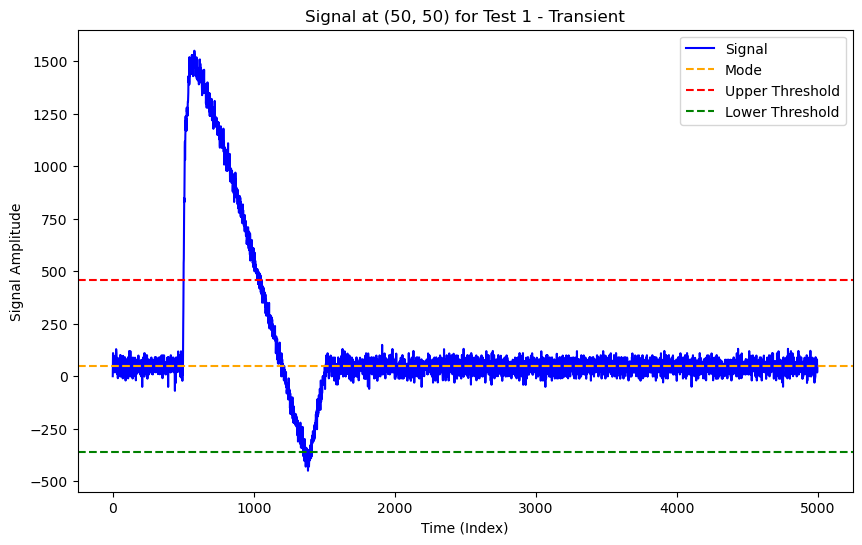

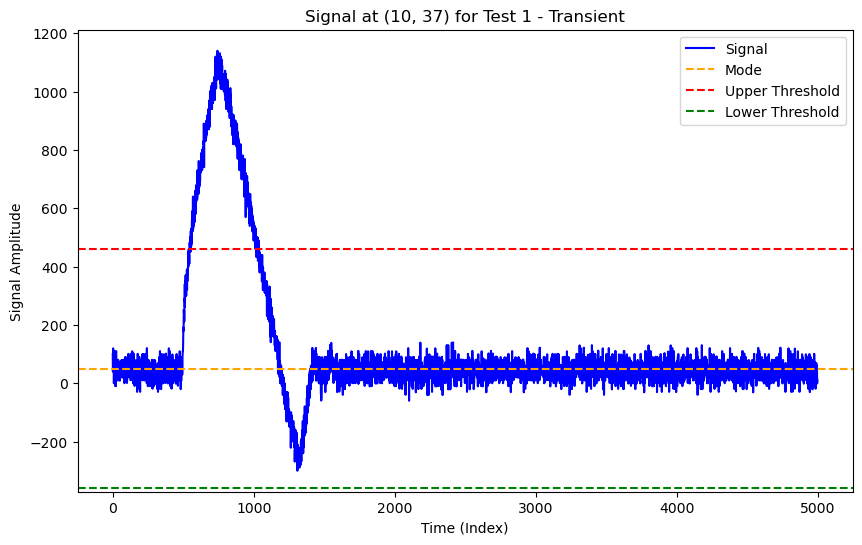

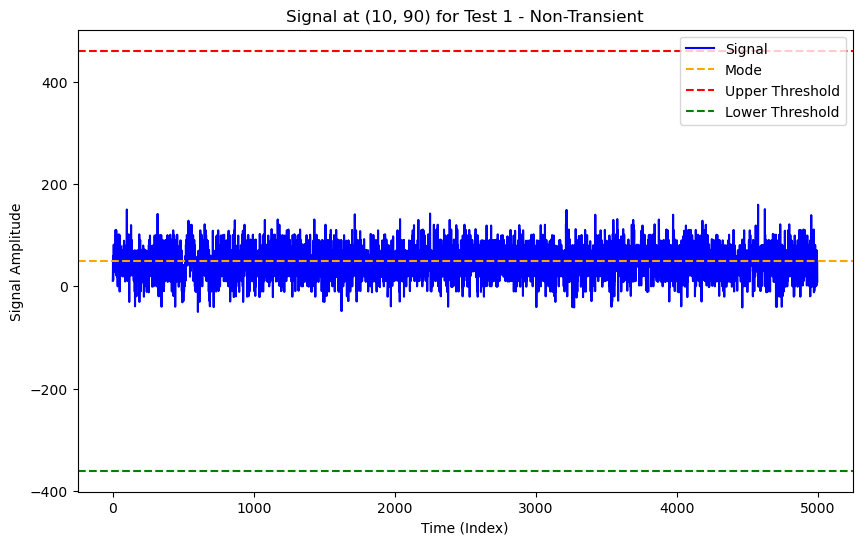

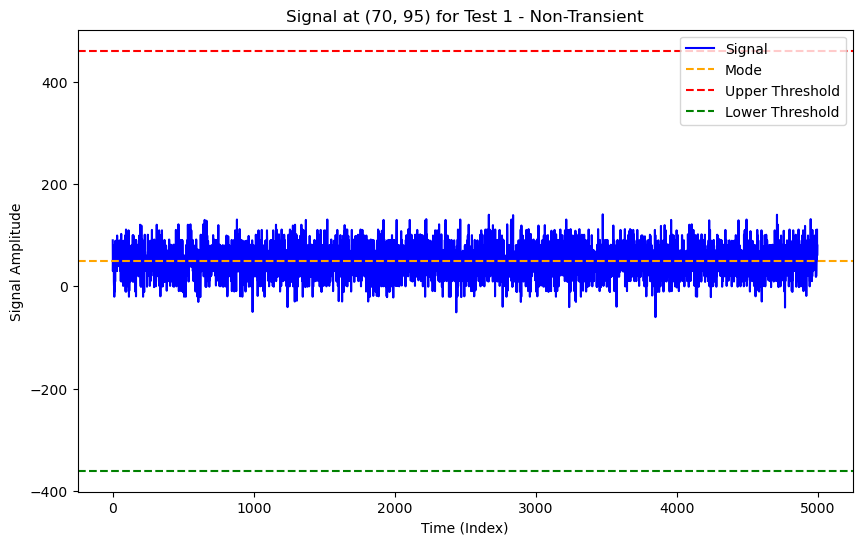

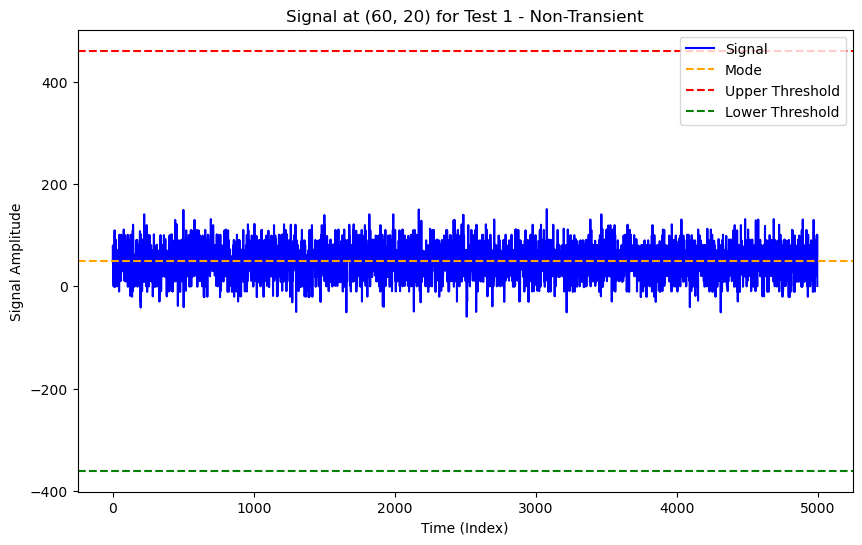

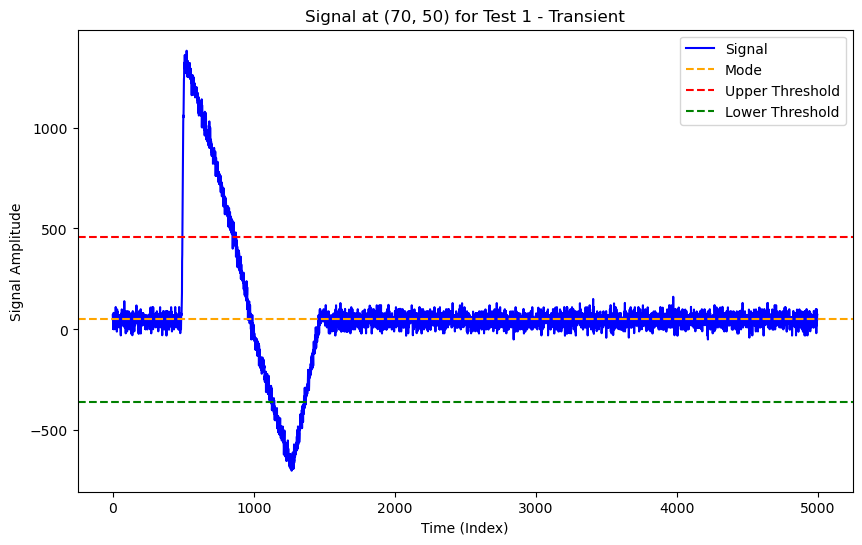

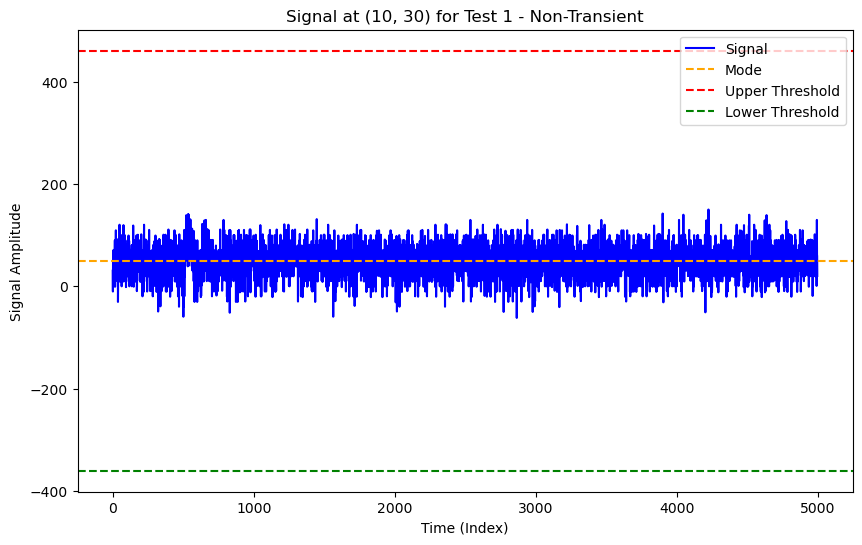

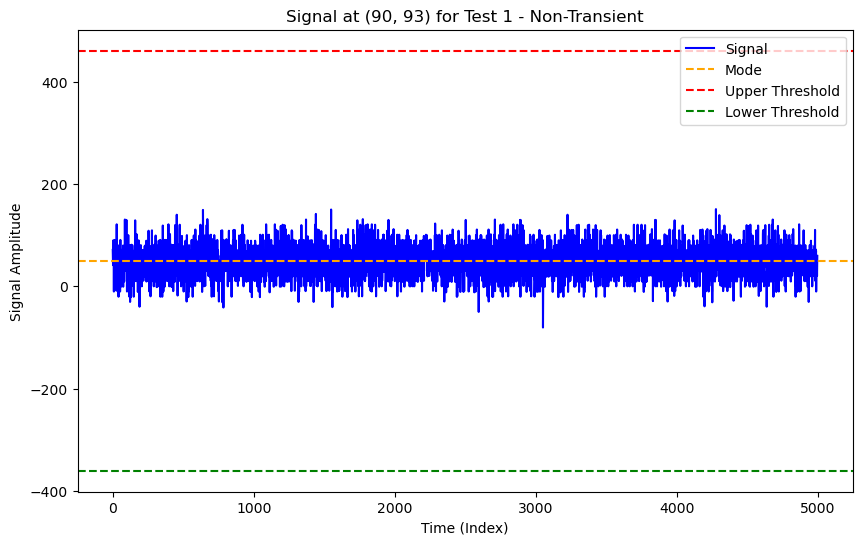

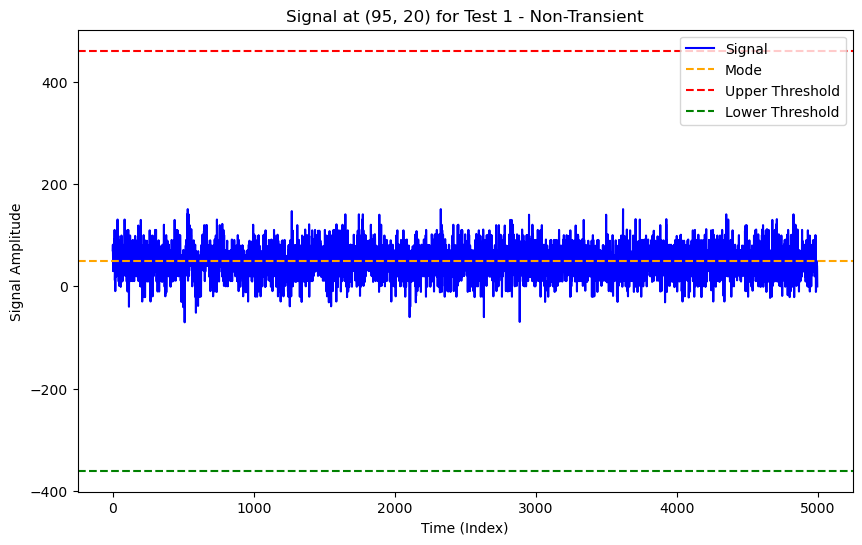

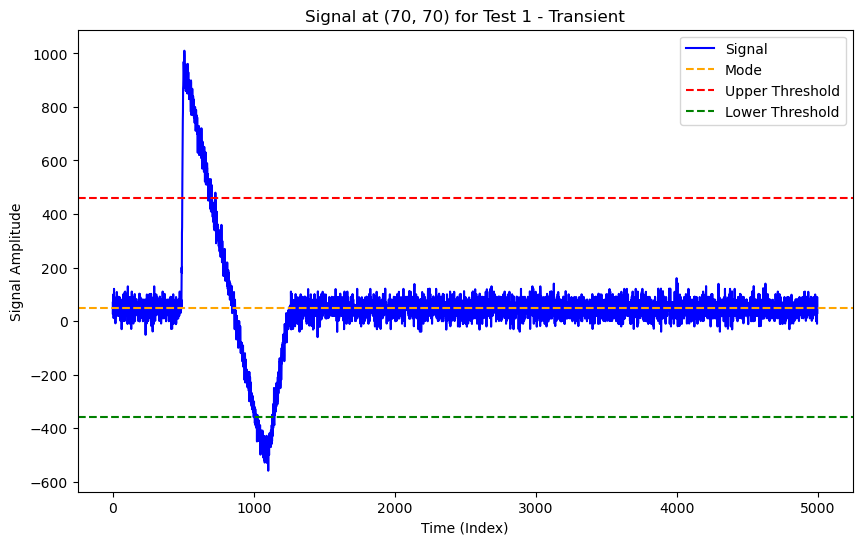

In [11]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.75  

run_one = full_data[0]  

def calculate_and_visualize_thresholds(test_num, coordinates, k):
    mode = 50
    std_dev = np.std(run_one)  # Calculate std_dev dynamically for the selected run

    upper_threshold = mode + k * std_dev
    lower_threshold = mode - k * std_dev

    for x, y in coordinates:
        signal = run_one[x, y]  

        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification = "Transient" if is_transient else "Non-Transient"

        plt.figure(figsize=(10, 6))
        plt.plot(signal, label="Signal", color="blue")
        plt.axhline(mode, color="orange", linestyle="--", label="Mode")
        plt.axhline(upper_threshold, color="red", linestyle="--", label="Upper Threshold")
        plt.axhline(lower_threshold, color="green", linestyle="--", label="Lower Threshold")
        plt.title(f"Signal at ({x}, {y}) for Test {test_num} - {classification}")
        plt.xlabel("Time (Index)")
        plt.ylabel("Signal Amplitude")
        plt.legend()
        plt.show()

       

# Test number
test_num = 1  

coordinates = [
    (50, 50), (10, 37), (10, 90), (70, 95), (60, 20),
    (70, 50), (10, 30), (90, 93), (95, 20), (70, 70)
]

# Call the function
calculate_and_visualize_thresholds(test_num, coordinates, k)


# EXPERIMENT #2

Processed Run with StdDev = 1317.59, K = 0.5
Upper Threshold = 708.79, Lower Threshold = -608.79
Number of Transients (1): 3065
Number of Non-Transients (0): 7136


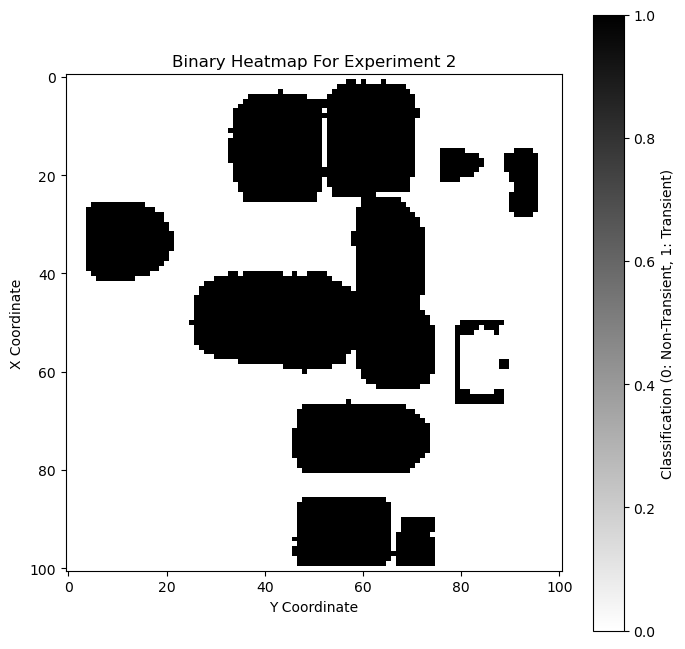

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Select the run to process (e.g., run_one)
run_two = full_data[1]  # Replace with your selected run

# Define the mode and standard deviation for this run
mode = 50
std_dev = np.std(run_two)

k = 0.5  

upper_threshold = mode + k * std_dev
lower_threshold = mode - k * std_dev

classification_matrix = np.zeros((run_two.shape[0], run_two.shape[1]), dtype=int)

for x in range(run_two.shape[0]):
    for y in range(run_two.shape[1]):
        signal = run_two[x, y]  # Extract the signal for the pixel
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification_matrix[x, y] = 1 if is_transient else 0

print(f"Processed Run with StdDev = {std_dev:.2f}, K = {k}")
print(f"Upper Threshold = {upper_threshold:.2f}, Lower Threshold = {lower_threshold:.2f}")
print(f"Number of Transients (1): {np.sum(classification_matrix == 1)}")
print(f"Number of Non-Transients (0): {np.sum(classification_matrix == 0)}")

plt.figure(figsize=(8, 8))
plt.title("Binary Heatmap For Experiment 2")
plt.imshow(classification_matrix, cmap="gray_r", origin="upper")  # "gray_r" for black = transient
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.colorbar(label="Classification (0: Non-Transient, 1: Transient)")
plt.show()


In [13]:
import pandas as pd

data_to_save_2 = []

for x in range(classification_matrix.shape[0]):
    for y in range(classification_matrix.shape[1]):
        classification = classification_matrix[x, y]
        data_to_save_2.append({"X": x, "Y": y, "Classification": classification})

df = pd.DataFrame(data_to_save_2)

csv_file = "run_two_classifications.csv"
df.to_csv(csv_file, index=False)
print(f"Classification results saved to {csv_file}")


Classification results saved to run_two_classifications.csv


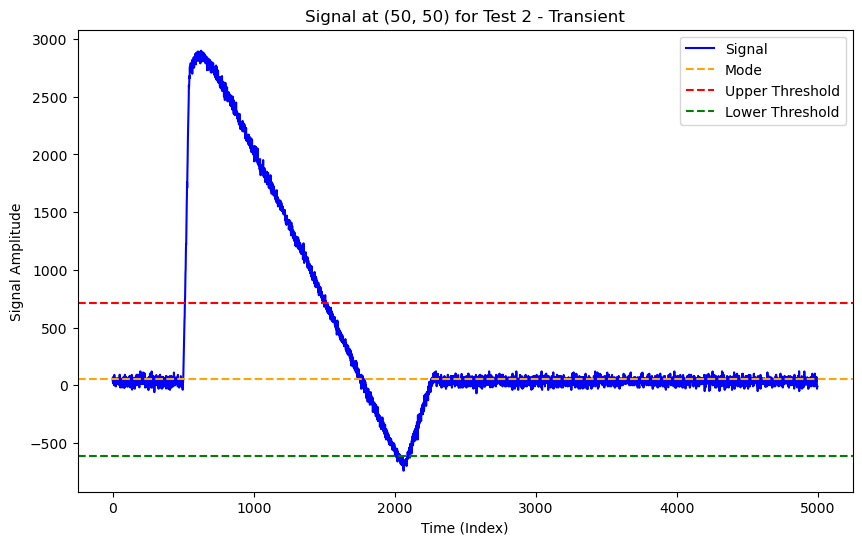

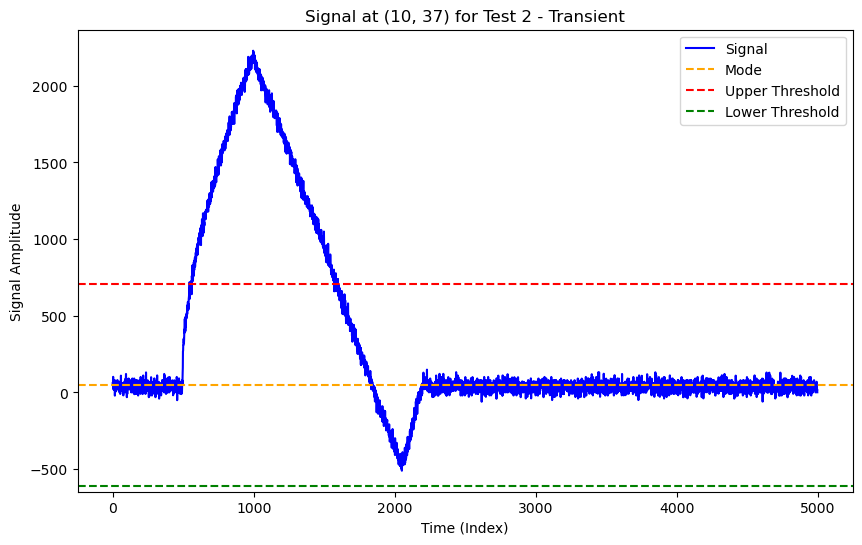

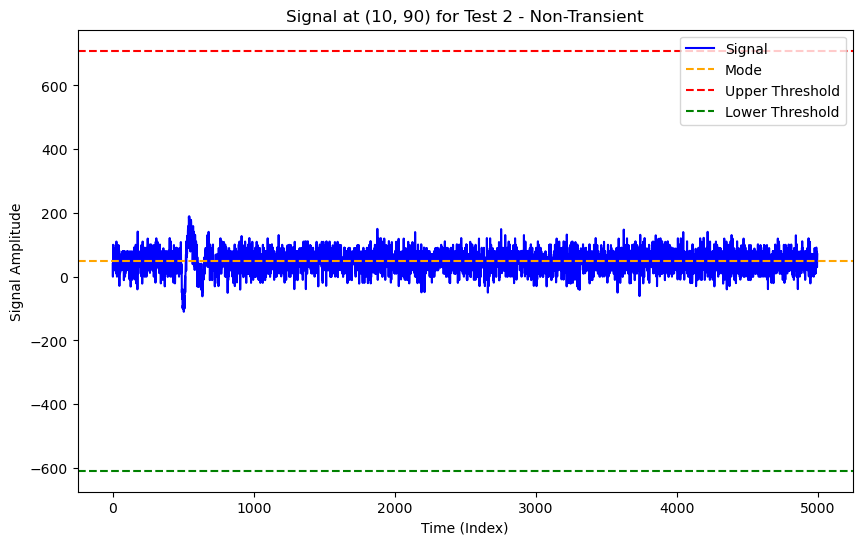

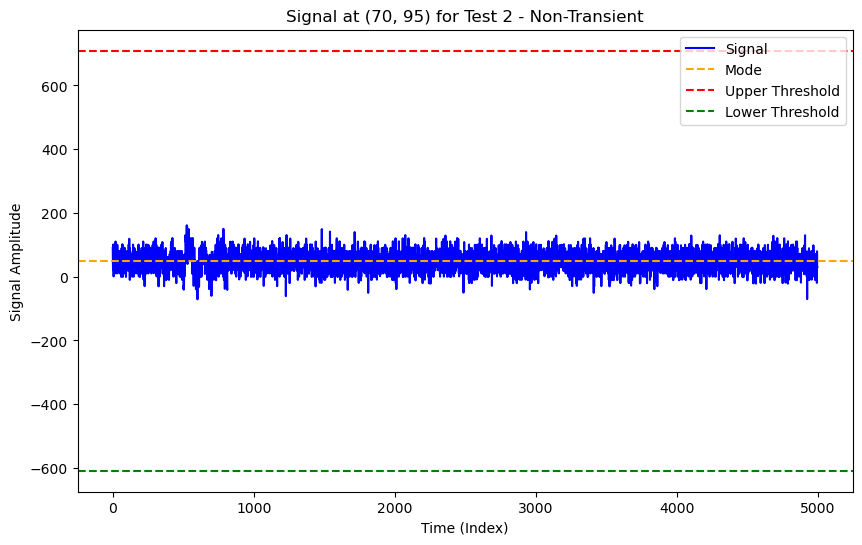

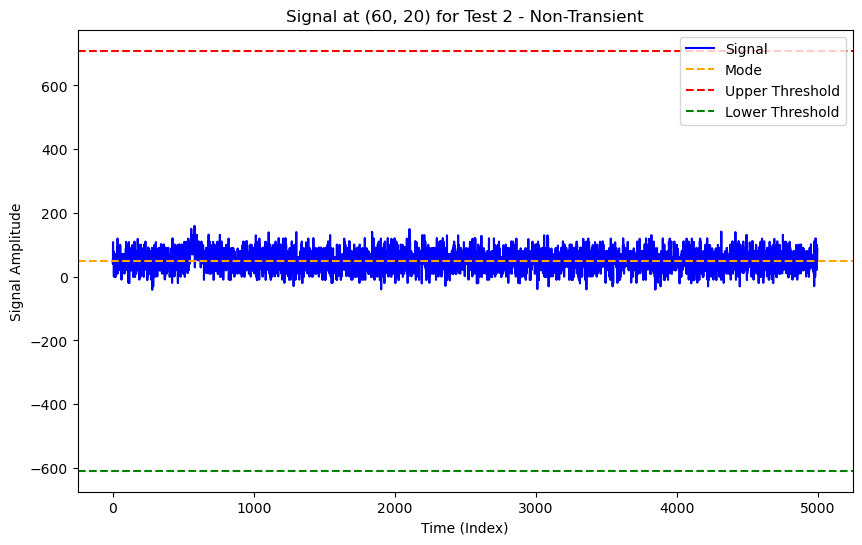

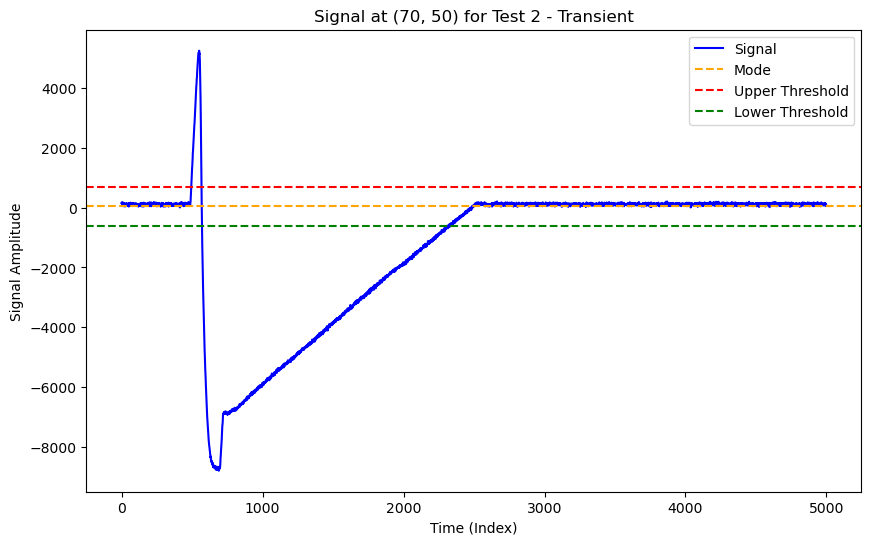

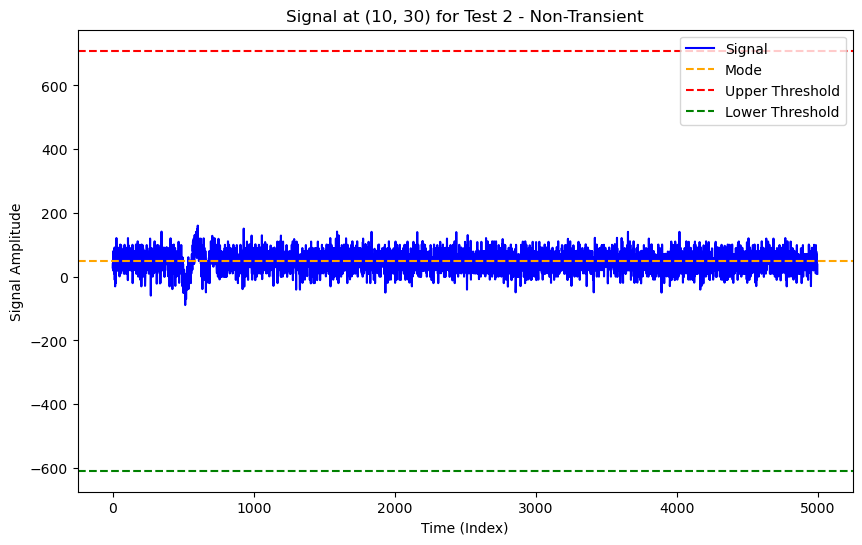

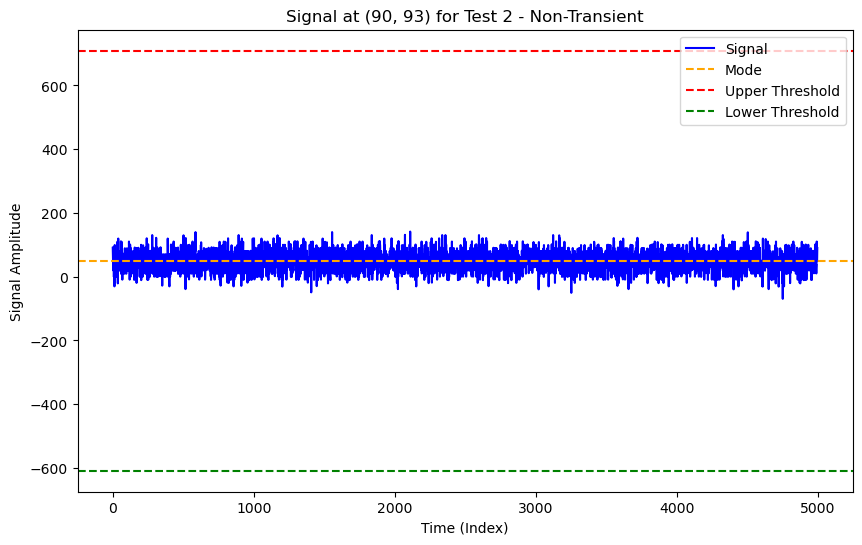

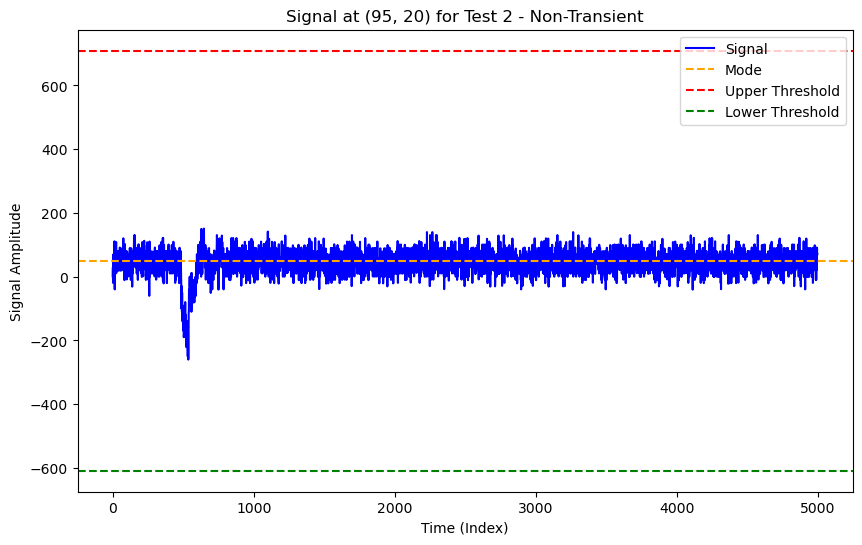

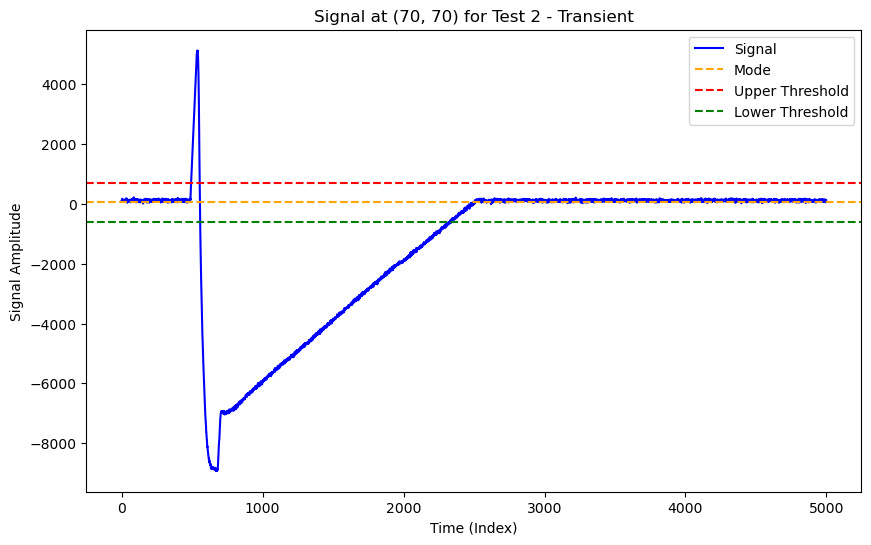

In [14]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.5  
run_two = full_data[1]  

def calculate_and_visualize_thresholds(test_num, coordinates, k):
    # Define mode for the signals
    mode = 50
    std_dev = np.std(run_two)  
    upper_threshold = mode + k * std_dev
    lower_threshold = mode - k * std_dev

    for x, y in coordinates:
        signal = run_two[x, y]  
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification = "Transient" if is_transient else "Non-Transient"
        plt.figure(figsize=(10, 6))
        plt.plot(signal, label="Signal", color="blue")
        plt.axhline(mode, color="orange", linestyle="--", label="Mode")
        plt.axhline(upper_threshold, color="red", linestyle="--", label="Upper Threshold")
        plt.axhline(lower_threshold, color="green", linestyle="--", label="Lower Threshold")
        plt.title(f"Signal at ({x}, {y}) for Test {test_num} - {classification}")
        plt.xlabel("Time (Index)")
        plt.ylabel("Signal Amplitude")
        plt.legend()
        plt.show()

       

# Test number
test_num = 2

coordinates = [
    (50, 50), (10, 37), (10, 90), (70, 95), (60, 20),
    (70, 50), (10, 30), (90, 93), (95, 20), (70, 70)
]

calculate_and_visualize_thresholds(test_num, coordinates, k)


# EXPERIMENT #3

Processed Run with StdDev = 2106.31, K = 0.63
Upper Threshold = 1376.97, Lower Threshold = -1276.97
Number of Transients (1): 4252
Number of Non-Transients (0): 5949


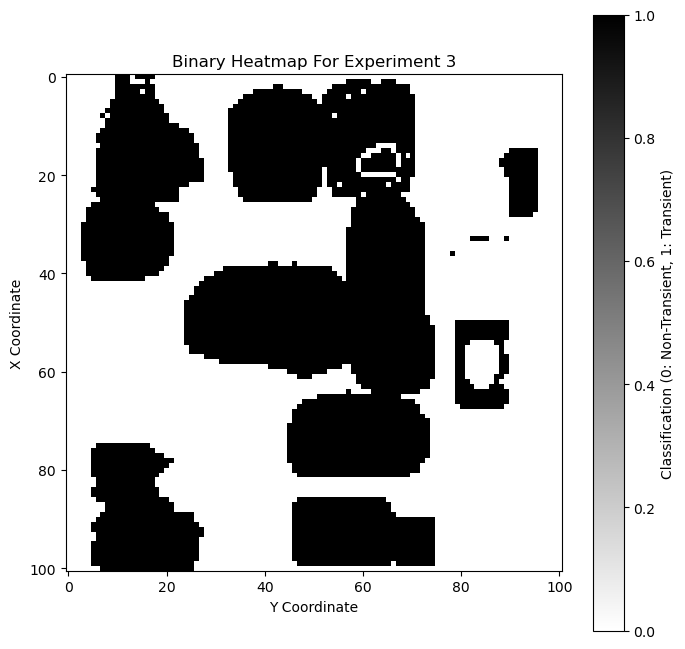

In [25]:
import numpy as np
import matplotlib.pyplot as plt

run_three = full_data[2]
mode = 50
std_dev = np.std(run_three)
k = 0.63

upper_threshold = mode + k * std_dev
lower_threshold = mode - k * std_dev

classification_matrix = np.zeros((run_three.shape[0], run_three.shape[1]), dtype=int)

for x in range(run_three.shape[0]):
    for y in range(run_three.shape[1]):
        signal = run_three[x, y]  
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification_matrix[x, y] = 1 if is_transient else 0

print(f"Processed Run with StdDev = {std_dev:.2f}, K = {k}")
print(f"Upper Threshold = {upper_threshold:.2f}, Lower Threshold = {lower_threshold:.2f}")
print(f"Number of Transients (1): {np.sum(classification_matrix == 1)}")
print(f"Number of Non-Transients (0): {np.sum(classification_matrix == 0)}")

plt.figure(figsize=(8, 8))
plt.title("Binary Heatmap For Experiment 3")
plt.imshow(classification_matrix, cmap="gray_r", origin="upper")  # "gray_r" for black = transient
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.colorbar(label="Classification (0: Non-Transient, 1: Transient)")
plt.show()


In [16]:
import pandas as pd


data_to_save_3 = []

for x in range(classification_matrix.shape[0]):
    for y in range(classification_matrix.shape[1]):
        classification = classification_matrix[x, y]
        data_to_save_3.append({"X": x, "Y": y, "Classification": classification})

df = pd.DataFrame(data_to_save_3)

csv_file = "run_three_classifications.csv"
df.to_csv(csv_file, index=False)
print(f"Classification results saved to {csv_file}")


Classification results saved to run_three_classifications.csv


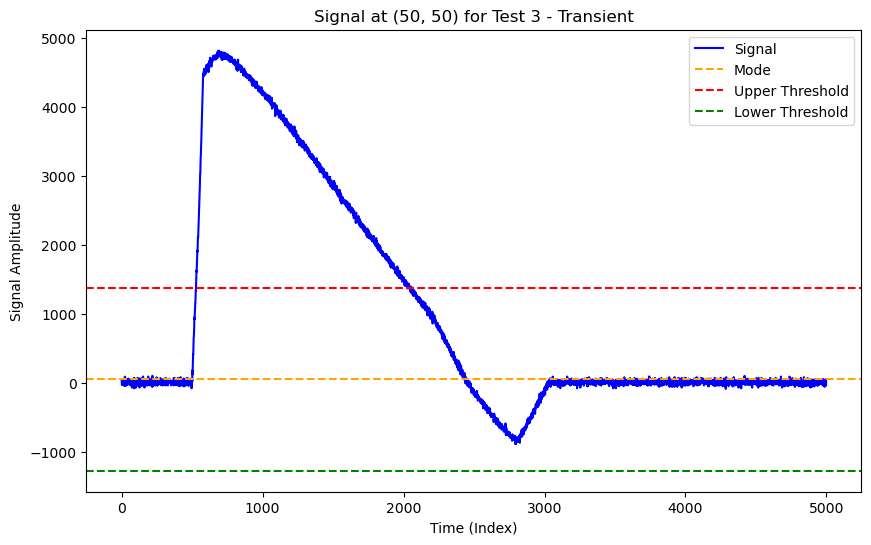

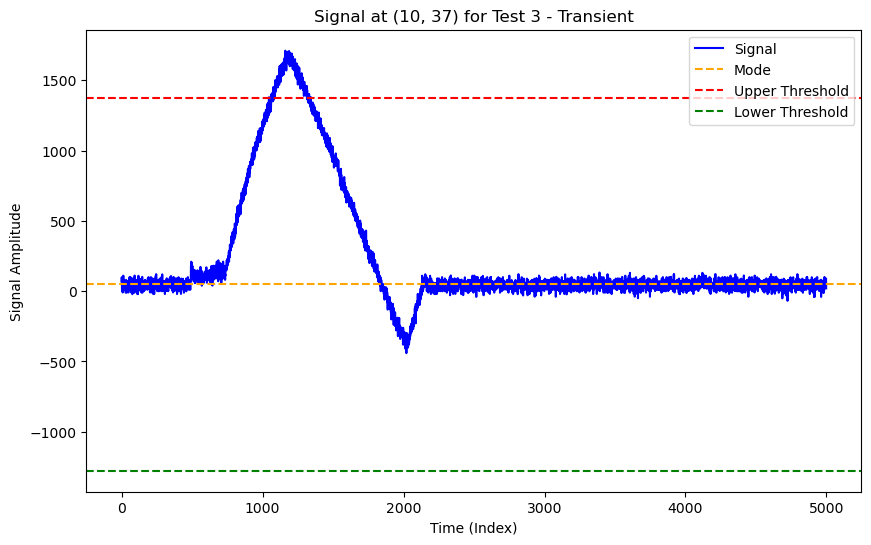

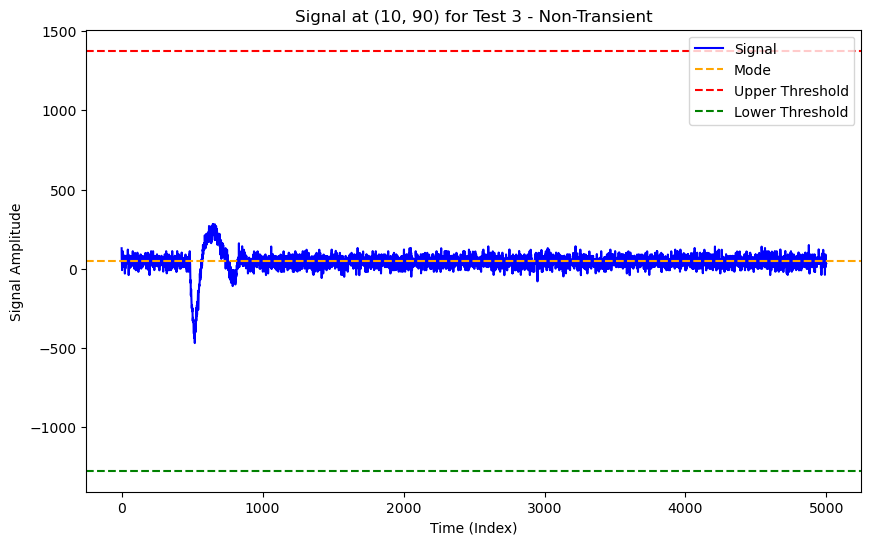

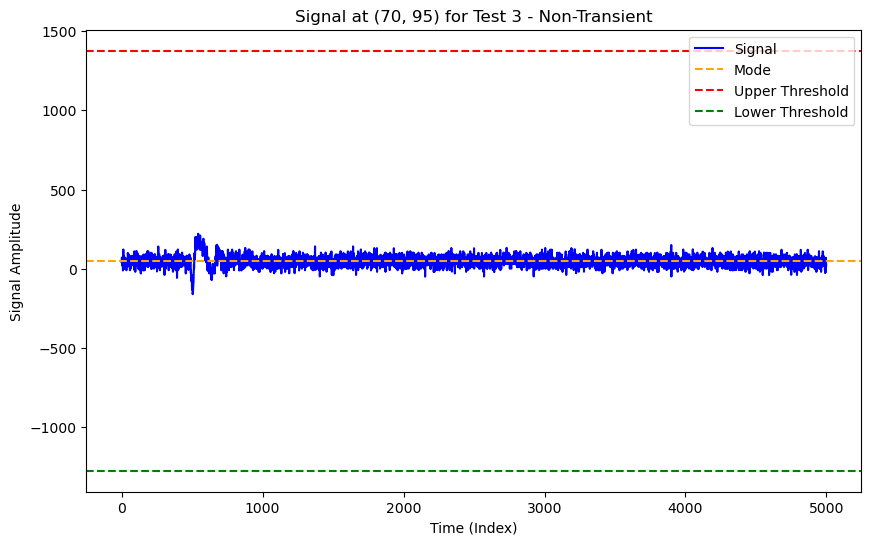

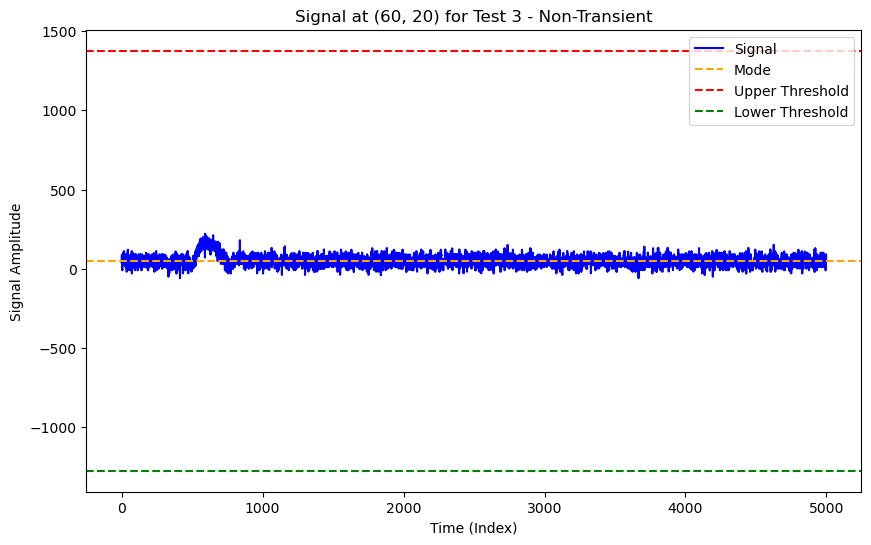

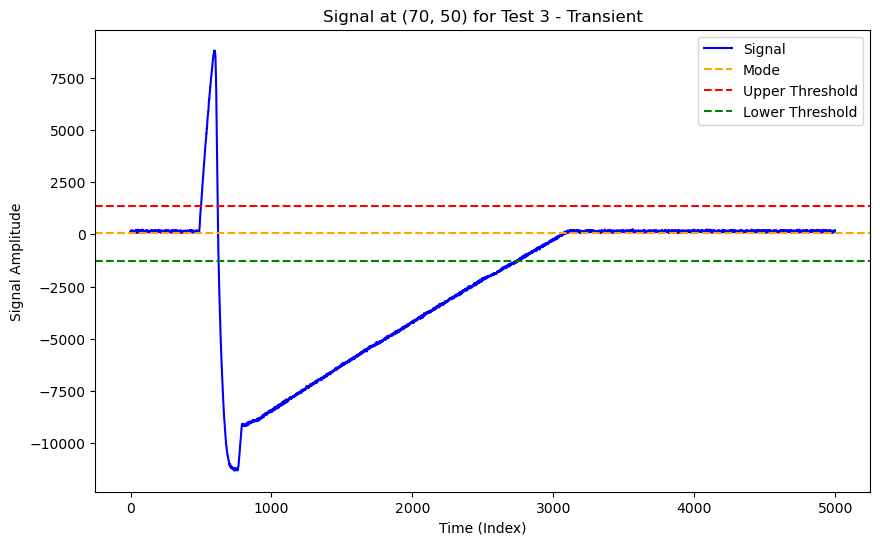

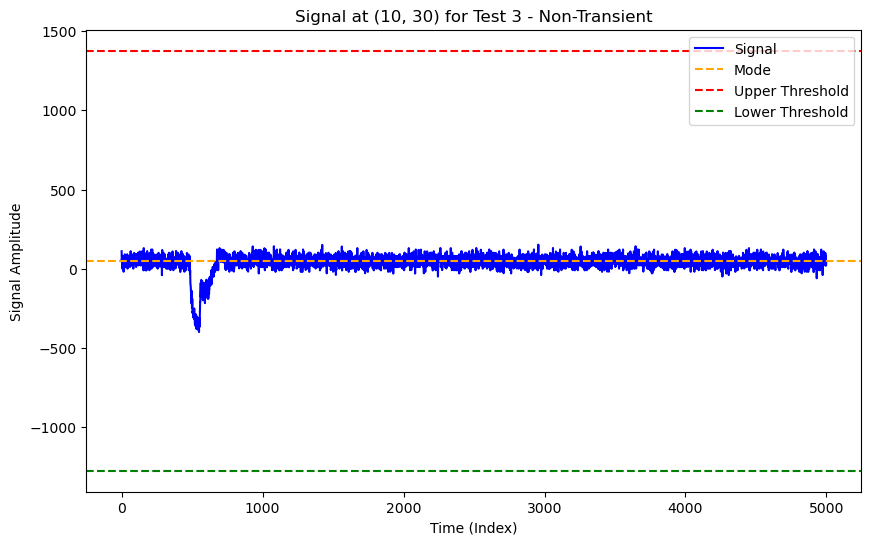

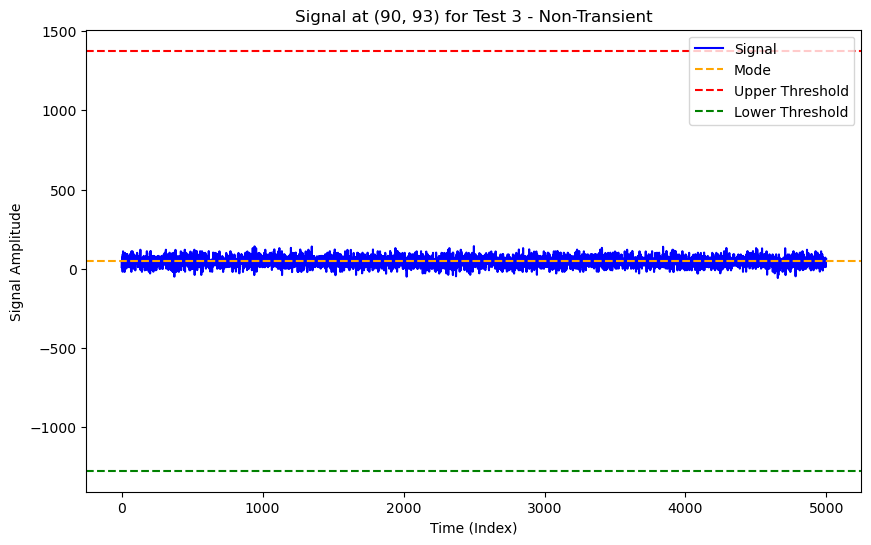

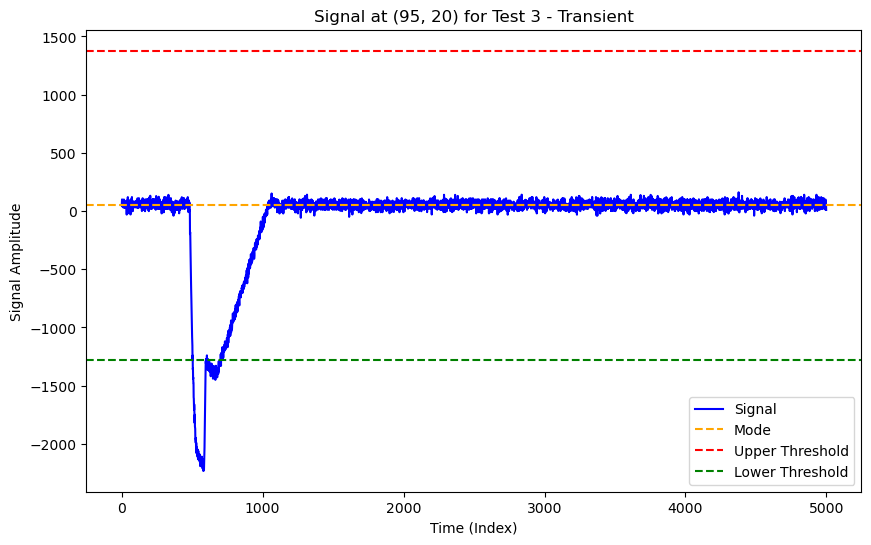

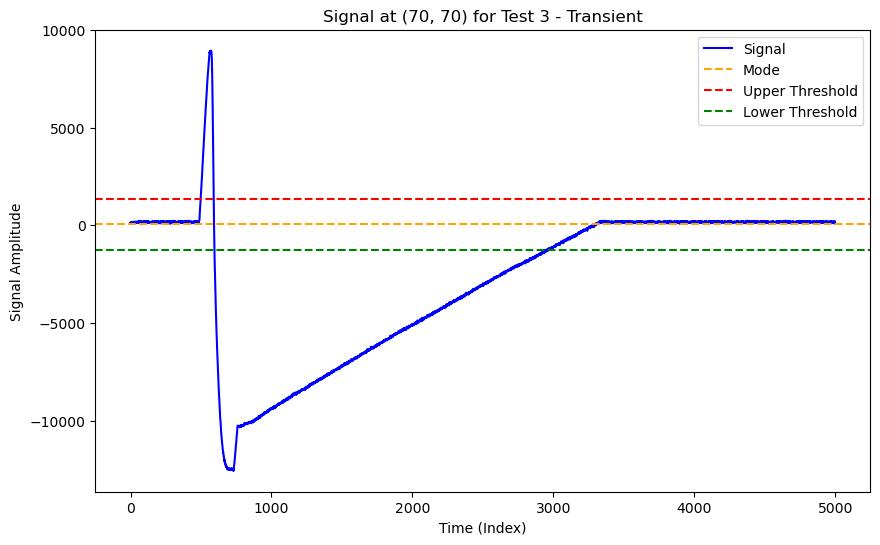

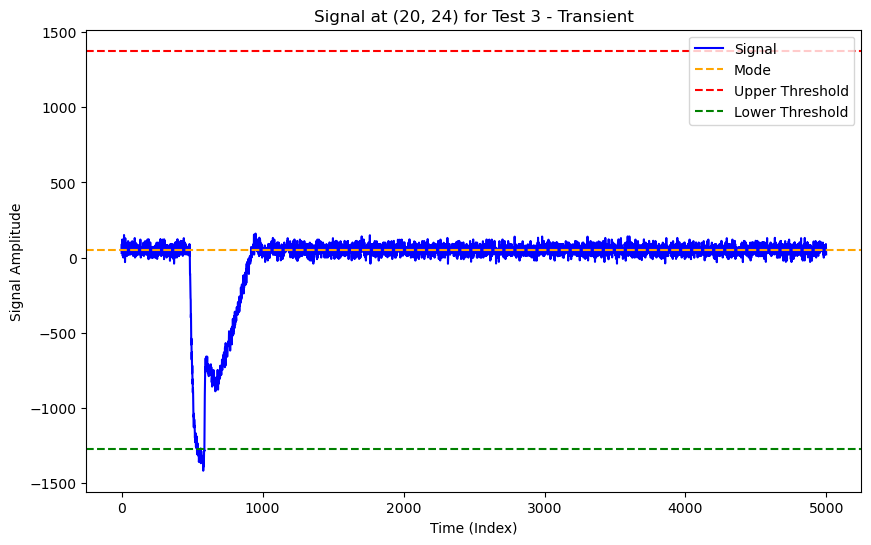

In [17]:
import numpy as np
import matplotlib.pyplot as plt


k = 0.63
run_three = full_data[2] 

def calculate_and_visualize_thresholds(test_num, coordinates, k):
    mode = 50
    std_dev = np.std(run_three) 
    upper_threshold = mode + k * std_dev
    lower_threshold = mode - k * std_dev

    for x, y in coordinates:
        signal = run_three[x, y]  
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification = "Transient" if is_transient else "Non-Transient"

        plt.figure(figsize=(10, 6))
        plt.plot(signal, label="Signal", color="blue")
        plt.axhline(mode, color="orange", linestyle="--", label="Mode")
        plt.axhline(upper_threshold, color="red", linestyle="--", label="Upper Threshold")
        plt.axhline(lower_threshold, color="green", linestyle="--", label="Lower Threshold")
        plt.title(f"Signal at ({x}, {y}) for Test {test_num} - {classification}")
        plt.xlabel("Time (Index)")
        plt.ylabel("Signal Amplitude")
        plt.legend()
        plt.show()

test_num = 3  

coordinates = [
    (50, 50), (10, 37), (10, 90), (70, 95), (60, 20),
    (70, 50), (10, 30), (90, 93), (95, 20), (70, 70), (20, 24)
]

calculate_and_visualize_thresholds(test_num, coordinates, k)


# Experiment Four

Processed Run with StdDev = 378.37, K = 1.1
Upper Threshold = 466.21, Lower Threshold = -366.21
Number of Transients (1): 2198
Number of Non-Transients (0): 8003


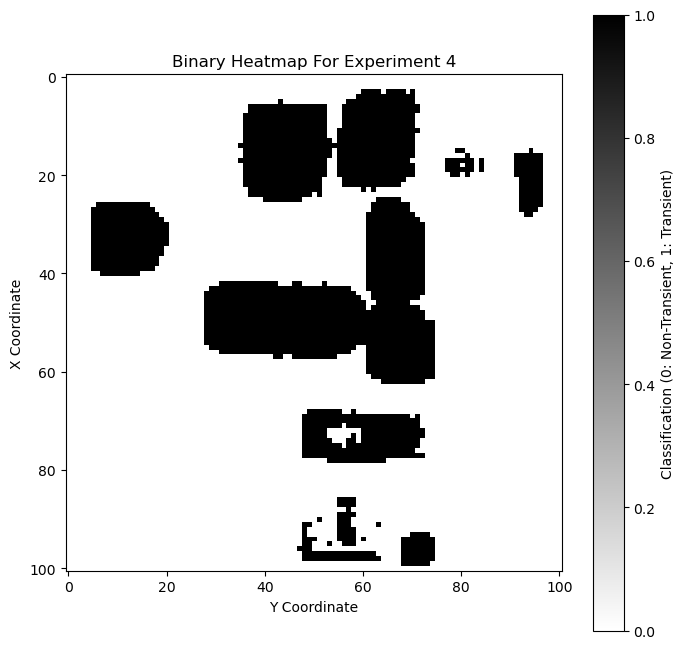

In [26]:
import numpy as np
import matplotlib.pyplot as plt

run_four = full_data[3]
mode = 50
std_dev = np.std(run_four)
k = 1.1

upper_threshold = mode + k * std_dev
lower_threshold = mode - k * std_dev

classification_matrix = np.zeros((run_four.shape[0], run_four.shape[1]), dtype=int)

for x in range(run_four.shape[0]):
    for y in range(run_four.shape[1]):
        signal = run_four[x, y]  
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification_matrix[x, y] = 1 if is_transient else 0

print(f"Processed Run with StdDev = {std_dev:.2f}, K = {k}")
print(f"Upper Threshold = {upper_threshold:.2f}, Lower Threshold = {lower_threshold:.2f}")
print(f"Number of Transients (1): {np.sum(classification_matrix == 1)}")
print(f"Number of Non-Transients (0): {np.sum(classification_matrix == 0)}")

plt.figure(figsize=(8, 8))
plt.title("Binary Heatmap For Experiment 4")
plt.imshow(classification_matrix, cmap="gray_r", origin="upper")  # "gray_r" for black = transient
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.colorbar(label="Classification (0: Non-Transient, 1: Transient)")
plt.show()


In [19]:
import pandas as pd


data_to_save_4 = []

for x in range(classification_matrix.shape[0]):
    for y in range(classification_matrix.shape[1]):
        classification = classification_matrix[x, y]
        data_to_save_4.append({"X": x, "Y": y, "Classification": classification})

df = pd.DataFrame(data_to_save_4)

csv_file = "run_four_classifications.csv"
df.to_csv(csv_file, index=False)
print(f"Classification results saved to {csv_file}")


Classification results saved to run_four_classifications.csv


# EXPERIMENT FIVE

Processed Run with StdDev = 1320.16, K = 0.4
Upper Threshold = 578.06, Lower Threshold = -478.06
Number of Transients (1): 5375
Number of Non-Transients (0): 4826


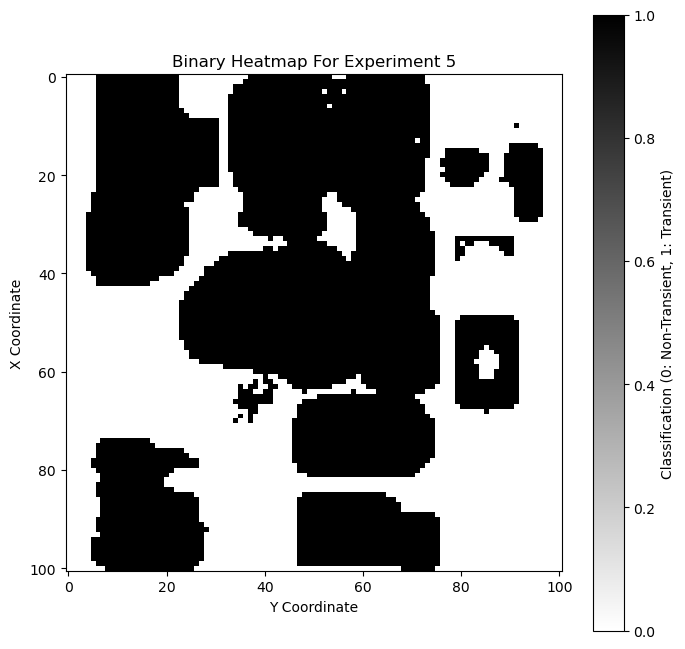

In [33]:
import numpy as np
import matplotlib.pyplot as plt

run_five = full_data[4]
mode = 50
std_dev = np.std(run_five)
k = 0.4

upper_threshold = mode + k * std_dev
lower_threshold = mode - k * std_dev

classification_matrix = np.zeros((run_five.shape[0], run_five.shape[1]), dtype=int)

for x in range(run_five.shape[0]):
    for y in range(run_five.shape[1]):
        signal = run_five[x, y]  
        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification_matrix[x, y] = 1 if is_transient else 0

print(f"Processed Run with StdDev = {std_dev:.2f}, K = {k}")
print(f"Upper Threshold = {upper_threshold:.2f}, Lower Threshold = {lower_threshold:.2f}")
print(f"Number of Transients (1): {np.sum(classification_matrix == 1)}")
print(f"Number of Non-Transients (0): {np.sum(classification_matrix == 0)}")

plt.figure(figsize=(8, 8))
plt.title("Binary Heatmap For Experiment 5")
plt.imshow(classification_matrix, cmap="gray_r", origin="upper")  # "gray_r" for black = transient
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.colorbar(label="Classification (0: Non-Transient, 1: Transient)")
plt.show()


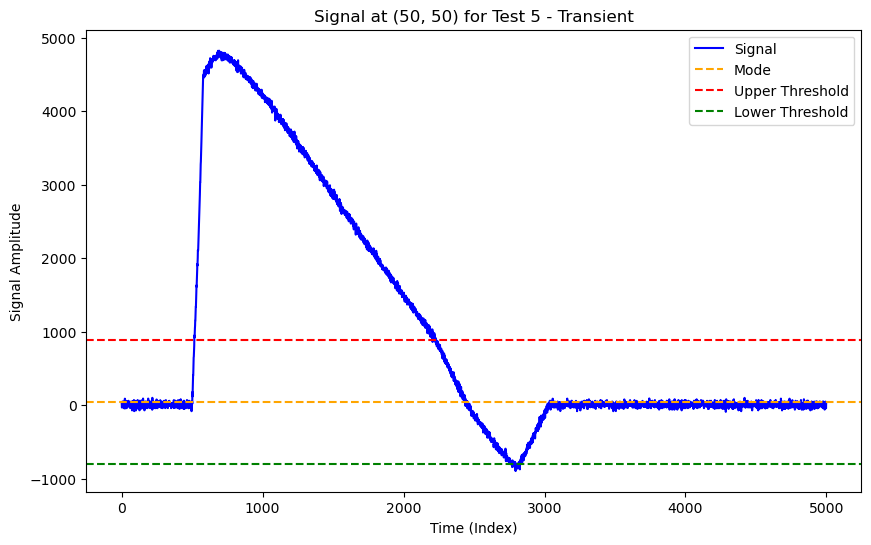

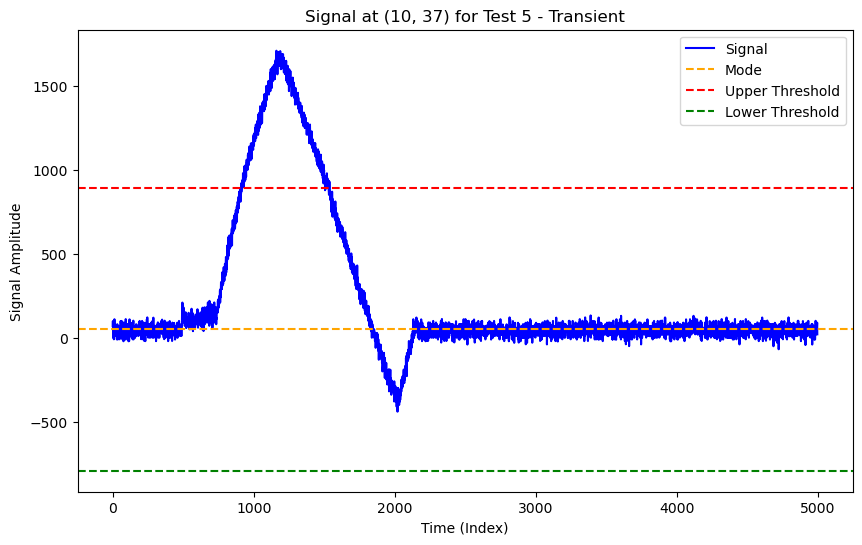

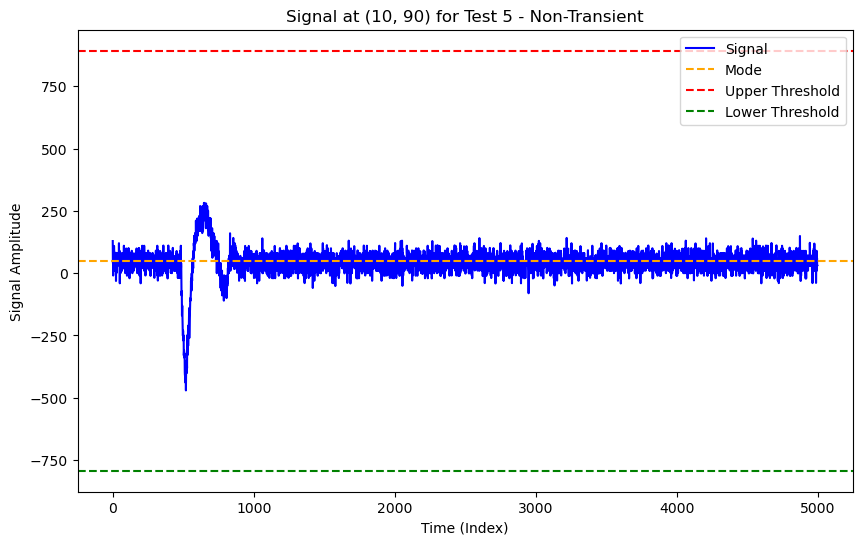

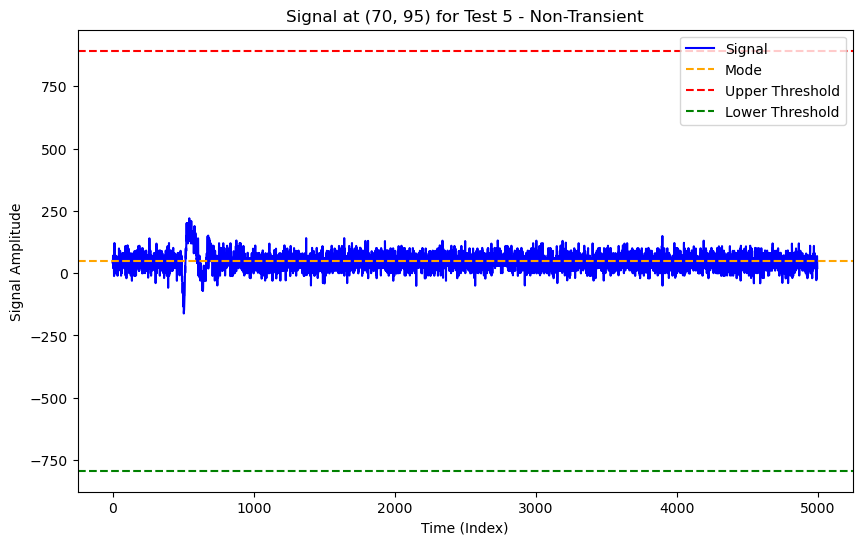

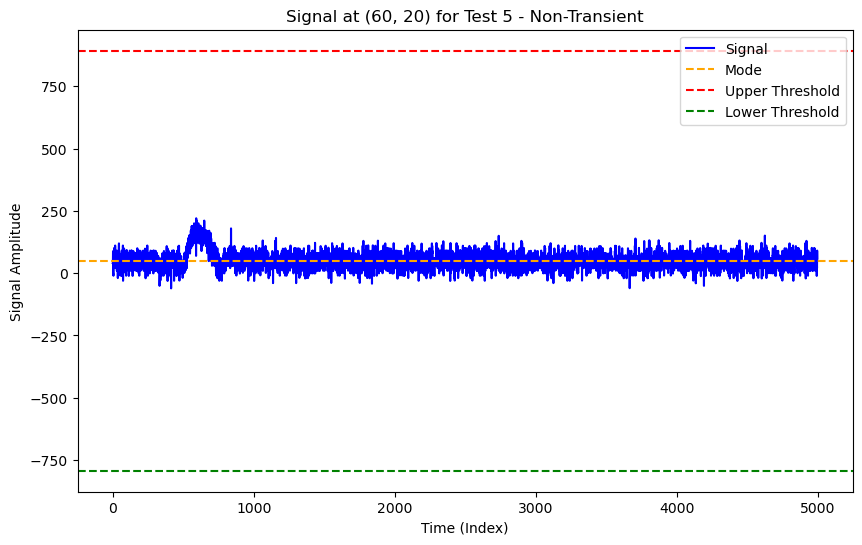

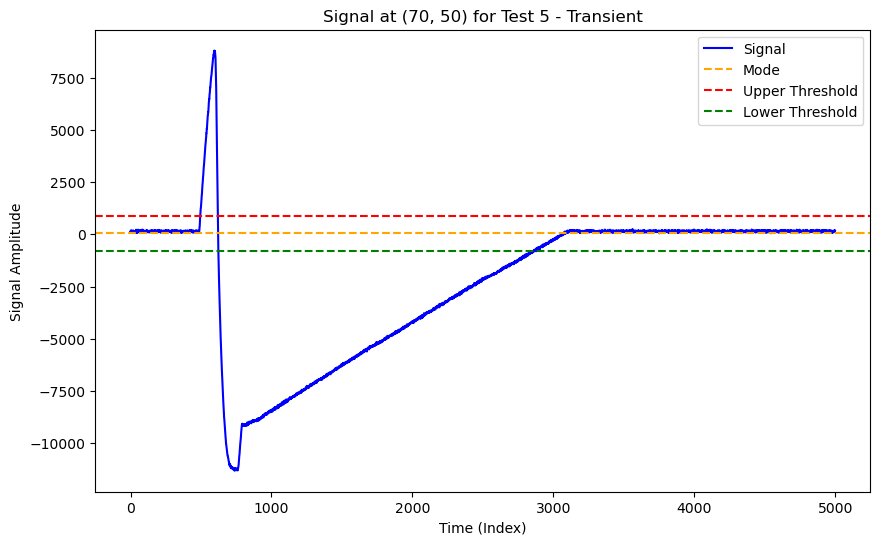

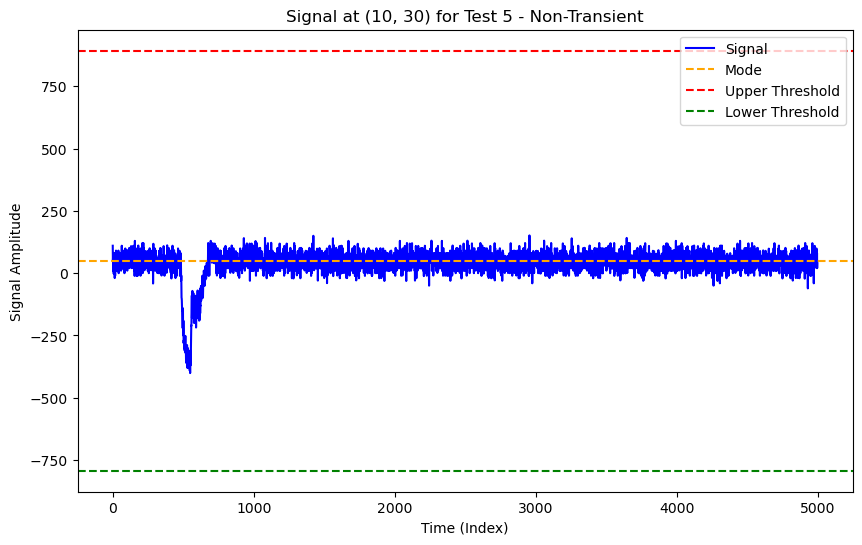

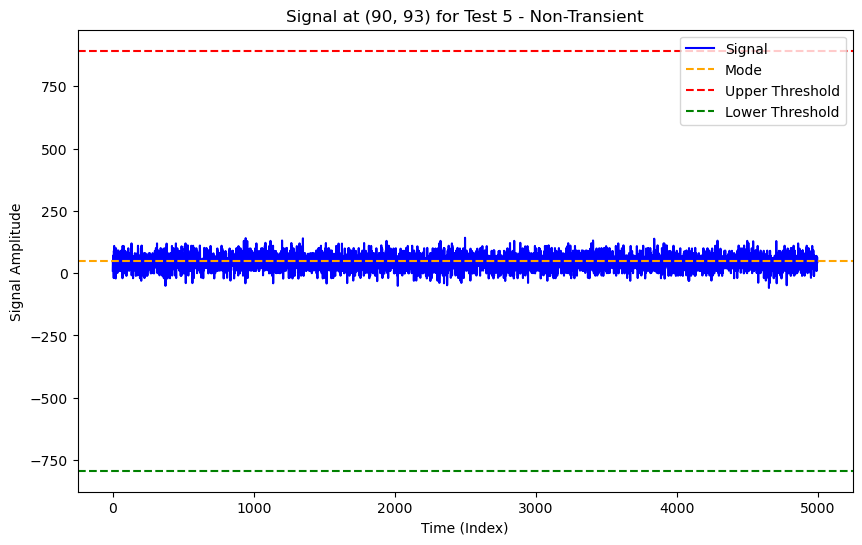

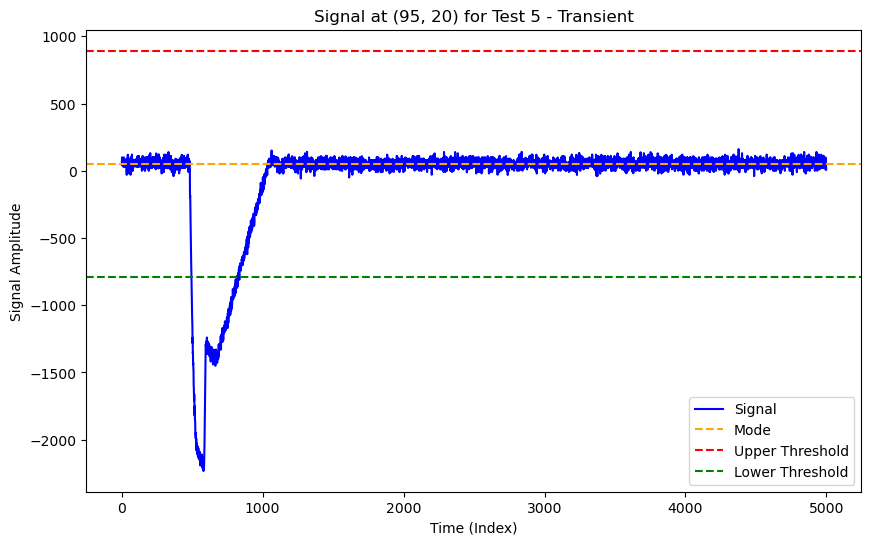

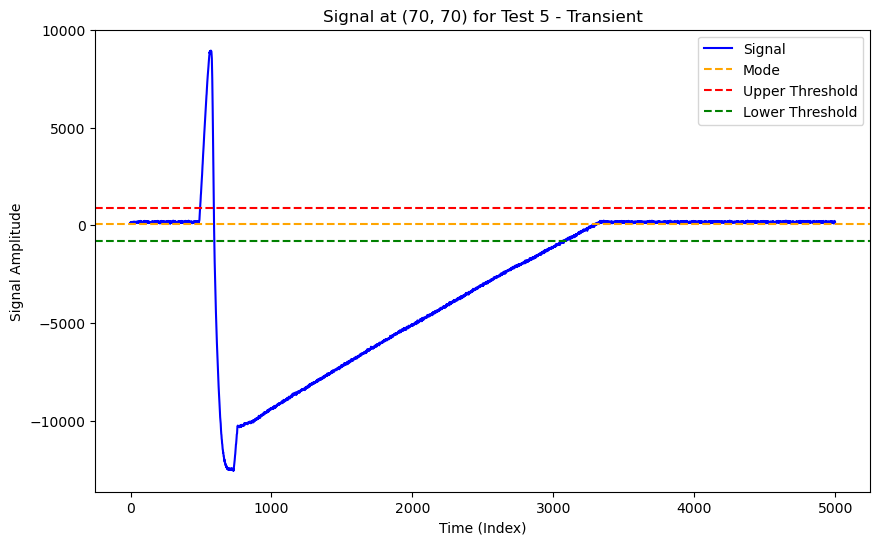

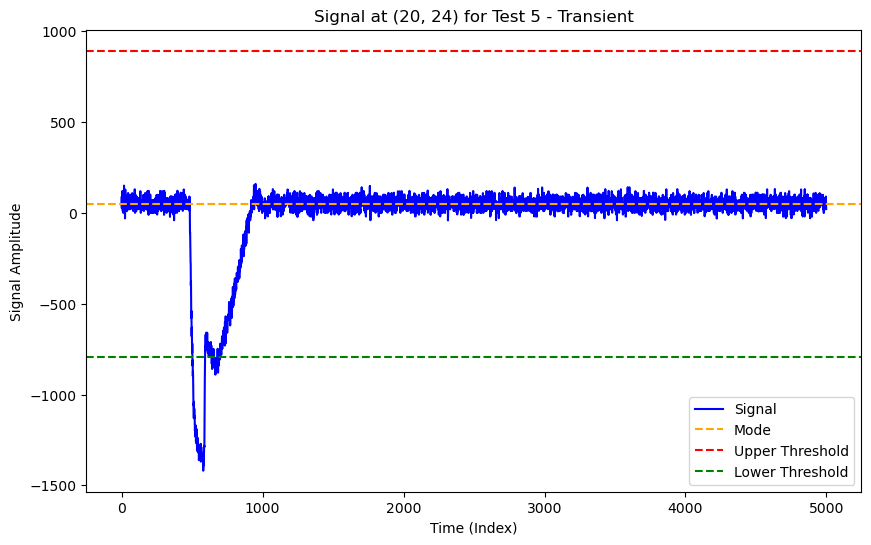

In [34]:
import numpy as np
import matplotlib.pyplot as plt


k = 0.4
run_five = full_data[2] 

# Function to calculate thresholds and classify a single pixel's signal
def calculate_and_visualize_thresholds(test_num, coordinates, k):
    # Define mode for the signals
    mode = 50
    std_dev = np.std(run_five)  

    # Calculate thresholds based on mode and std_dev
    upper_threshold = mode + k * std_dev
    lower_threshold = mode - k * std_dev

    # Process each coordinate
    for x, y in coordinates:
        signal = run_five[x, y]  

        is_transient = np.any(signal > upper_threshold) or np.any(signal < lower_threshold)
        classification = "Transient" if is_transient else "Non-Transient"
        
        plt.figure(figsize=(10, 6))
        plt.plot(signal, label="Signal", color="blue")
        plt.axhline(mode, color="orange", linestyle="--", label="Mode")
        plt.axhline(upper_threshold, color="red", linestyle="--", label="Upper Threshold")
        plt.axhline(lower_threshold, color="green", linestyle="--", label="Lower Threshold")
        plt.title(f"Signal at ({x}, {y}) for Test {test_num} - {classification}")
        plt.xlabel("Time (Index)")
        plt.ylabel("Signal Amplitude")
        plt.legend()
        plt.show()

test_num = 5  

coordinates = [
    (50, 50), (10, 37), (10, 90), (70, 95), (60, 20),
    (70, 50), (10, 30), (90, 93), (95, 20), (70, 70), (20, 24)
]

calculate_and_visualize_thresholds(test_num, coordinates, k)
